### This notebook is to test reading of the analysis and background statistic files for radar data

In [1]:
import os
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import ImageGrid, make_axes_locatable
from scipy.io import FortranFile

In [2]:
base_dir = '/Users/dawson29/sshfs_mounts/rice_scratch/Projects/051913_OK/ARPS/EnKF/3km153x153_6km153x153_051913_OK_NAM/3km153x153_6km153x153_051913_OK_NAM_rfopt2/stats'

In [13]:
nproc_x = 3
nproc_y = 5
numvar = 2

# Obs file
bg_file_name = 'KTLXbg055800'
bg_path = os.path.join(base_dir, bg_file_name)

# Note that in the following, I had to look up how the file was written in errscore.f90
ff = FortranFile(bg_path, 'r', header_dtype='>i4') # Had to do some trial and error to figure out the header type
timeset, iyr, imon, iday, ihour, imin, isec = ff.read_record('>i4')
ntilt, nxp, nyp = ff.read_record('>i4')

nx = (nxp - 3) * nproc_x + 3
ny = (nyp - 3) * nproc_y + 3

rdrnam = ff.read_record('>i4').tostring().decode()
rdrlat, rdrlon, radarx, radary, rdralt = ff.read_record('>f4')
dazim, rngmin, rngmax = ff.read_record('>f4')
elvobs = ff.read_record('>f4')
hgtoelv = ff.read_record('>f4').reshape(ntilt, ny, nx)
rngoelv = ff.read_record('>f4').reshape(ntilt, ny, nx)
rdrobs = ff.read_record('>f4').reshape(numvar, ntilt, ny, nx)

print(timeset, iyr, imon, iday, ihour, imin, isec)
print(ntilt, nxp, nyp)
print("Full grid ", nx, ny)
print(rdrnam)
print(rdrlat, rdrlon, radarx, radary, rdralt)
print(dazim, rngmin, rngmax)
print(elvobs)


0 2013 5 19 21 27 57
14 53 33
Full grid  153 153
KTLX
35.33305 -97.27748 225001.39 224995.0 388.0
1.0 3000.0 230000.0
[-999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999. -999.
 -999. -999.]


/Users/dawson29/miniconda3/envs/pyCRMtools/lib/python3.7/site-packages/scipy/io/_fortran.py:96: UserWarning: Given a dtype which is not unsigned.
  warnings.warn("Given a dtype which is not unsigned.")


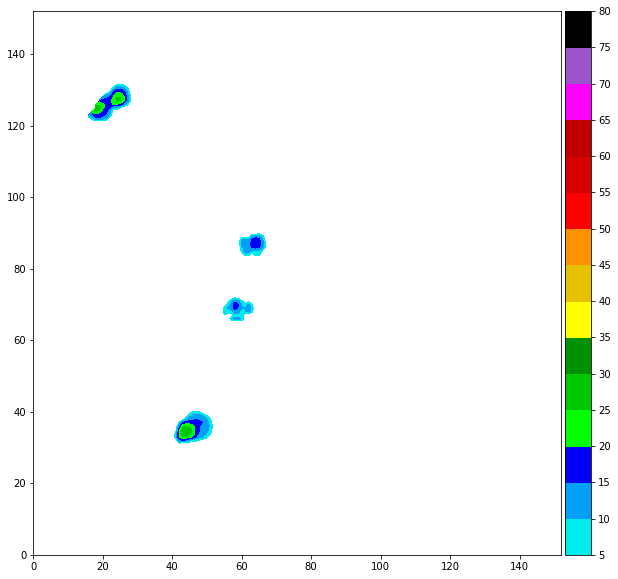

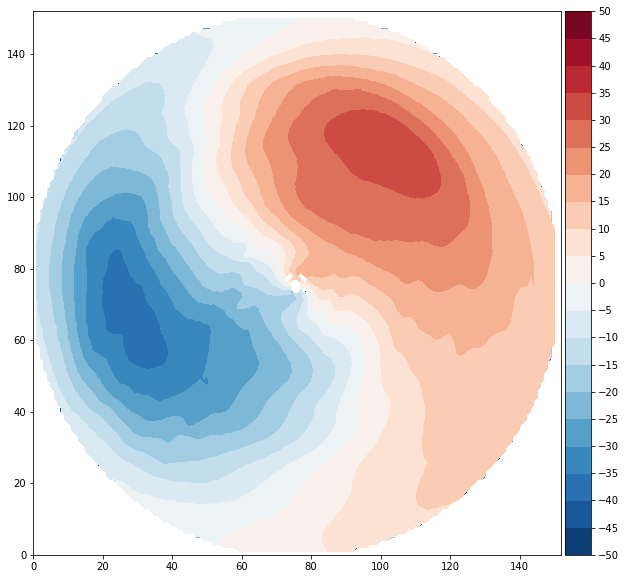

In [14]:
# Quick and dirty plot of the observations
from metpy.plots import ctables
normdBZ, cmapdBZ = ctables.registry.get_with_steps('NWSReflectivity', 5., 5.)
fig, ax = plt.subplots(figsize=(10,10))


clevels = np.arange(5.0, 85.0, 5.0)
dBZ_plt = ax.contourf(rdrobs[1, 0, :, :], levels=clevels, cmap=cmapdBZ)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
colorbar = plt.colorbar(dBZ_plt, orientation="vertical", ticks=clevels, cax=cax)

fig, ax = plt.subplots(figsize=(10,10))
clevels = np.arange(-50., 55.0, 5.0)
VR_plt = ax.contourf(rdrobs[0, 5, :, :], levels=clevels, cmap=matplotlib.cm.RdBu_r)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
colorbar = plt.colorbar(VR_plt, orientation="vertical", ticks=clevels, cax=cax)